# Digital Lab 2 - Python Fundamentals Part 2
Author: Emil G. Melfald, University of South-Eastern Norway <br><br>
This notebook is the continuation of the Python fundamentals series, focusing on more advanced techniques applicable to **Electric Power Analysis**. Building on the foundational skills from Part 1, we will explore objective functions, root finding, and optimization.

## Prerequisites
Before proceeding, students should thoroughly understand the concepts introduced in **Part 1** of the Python fundamentals. Familiarity with basic mathematical concepts related to root finding and optimization is also beneficial but not required.

## Learning Objectives
By the end of this notebook, you will be able to:
- **Formulate** appropriate objective functions for various problems.
- **Find the zeros** (roots) of multivariate functions using **Scipy**.
- **Optimize** objective functions with constraints, utilizing the power of computational methods.

## Contents
1. [Motivation for Solving Multivariate Systems](#Motivation)
2. [Mathematical Formulation of Objective Functions](#Objective)
3. [Using Scipy for Root Finding](#Root)
4. [Using Scipy for Optimization](#Optimization)
---

# 1. [Motivation for Solving Multivariate Systems](#Motivation)

Multivariate systems consist of multiple variables and equations. Solving these systems is a fundamental task in mathematics, engineering, economics, and various other disciplines. The complexity of solving multivariate systems ranges from basic linear algebra to sophisticated optimization problems in real-world applications.

### 1.1 Basic Mathematical Concept: System of Linear Equations

Consider the system of linear equations:

\begin{align*}
3x + 4y &= 12 \\
5x - 2y &= 1
\end{align*}

This represents a fundamental problem in algebra that can be solved using various techniques like substitution, elimination, or matrix methods. Mathematically, the problem is **linear** and we therefore in this case may use linear algebra: 

$$\begin{bmatrix} 3 & 4 \\ 5 & -2 \end{bmatrix}\begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} 12 \\ 1\end{bmatrix} $$

In [2]:
import numpy as np

A = np.array([[3, 4], [5, -2]])
b = np.array([12, 1])

# Solve the linear system using numpy: 
solution = np.linalg.solve(A, b)
print(f"The solution is x = {solution[0]} and y = {solution[1]}")

# Solve the linear system using matrix inversion: 
solution = np.linalg.inv(A) @ b 
print(f"The solution is x = {solution[0]}, y = {solution[1]}")

The solution is x = 1.076923076923077 and y = 2.1923076923076925
The solution is x = 1.076923076923077, y = 2.192307692307692


## 1.2 Nonlinear systems
In more general terms, the above system of equations can be expressed as two separate equations with the following form: 

$$
\begin{align*}
H_1(x, y) = \text{Non-linear function 1} \\
H_2(x, y) = \text{Non-linear function 2}
\end{align*}
$$

A solution for $x$ and $y$ is found when $[H_1(x, y), H_2(x, y)] = [0, 0]$, also written as $\textbf{H}(\textbf{x}) = \textbf{0}$.

As you have learned, the power flow equations can be formulated as a system of equations where the **power flow error** for each calculated bus should be zero. The variables we solve for can be represented as $ y = [ \theta_1, ..., \theta_{N_{\text{bus}}}, V_1, ..., V_{N_{\text{bus}}}]$ (remember to exclude $V_{\text{slack}}$, $\theta_{\text{slack}}$, and all $V_g$ from $y$). We can represent this system as a set of nonlinear functions, where each function $H_i$ represent one power flow error equation:

$$ \textbf{H}(\vec{y}) = [H_1(\vec{y}), ..., H_N(\vec{y})] $$

A solution to the system for is found when the following equation is satisfied: 

$$ \textbf{H}(\vec{y}) = \vec{0} $$

Solving this system for $\vec{y}$ will yield the correct voltage magnitudes and angles for all busbars in the system (if a feasible solution exists).

**Note**: This topic will be covered in more detail in DigiLab 3.

### Main Challenge
The equation for active power at busbar i: 
$$ P_i = V_i \sum_{k=1}^{N_{\text{bus}}} V_k (G_{ik} \cos \theta_{ik} + B_{ik} \sin \theta_{ik}) $$
$$ Q_i = V_i \sum_{k=1}^{N_{\text{bus}}} V_k (G_{ik} \sin \theta_{ik} - B_{ik} \cos \theta_{ik}) $$


The power flow equations are nonlinear, including trigonometric functions like $\sin$ and $\cos$, so the linear algebra method shown previously will not yield the correct answer in the first iteration. Algorithms for iteratively solving the **Power Flow Equations**, such as **Gauss-Seidel** or **Newton-Raphson**, are commonly used.

The **Scipy** library provides an intuitive API that simplifies the task of solving such nonlinear equations. It will be explored later in this notebook to showcase its applicability in power system analysis.

## 1.3 Multivariate Optimization
Optimization includes three main components. First is the **objective function** which is to be minimized or maximized. Secondly is the **decision variables** which affect our objective function. Lastly is the **optimization constraints**, which set some limits on our decision variables. Constraints may be in the form of equality, or inequality constraints, taking the form shown below. An optimization problem may in general be formulated as follows:

$$x^* = \arg\min_{x} J(x)$$

s. t. (subject to) 

$$
\begin{align*}
H(x) = 0 \\
G(x) \ge 0
\end{align*}
$$

Common optimization problems related to power system engineering may be: 
* Optimal Power Flow (OPF) 
* Optimal Reactive Power Dispatch (ORPD) 
* Unit Commitment 
* Economic Dispatch 
* Optimal Switch Posistion
* State and parameter estimation

All of the above objectives are non linear, and possibly mixed integer. Mixed integer means decision variables include both integer and continuous variables. In other words, some of the variables in the problem can only take on integer values (e.g., 0, 1, 2, ...), while others can take on any real (continuous) values (e.g., 2.54, 3.67, ...). Using **Scipy** we will skip the complecated details around the implementation of the optimization algorithms. 

---

# [Mathematical Formulation of Objective Functions](#Objective)

An objective function describes the performance measure of a model for different decision variable values. It quantifies what the root-finder or optimizer shoud solve. The decision variables are the variables that a model will optimize over - they are the "knobs" we can turn to influence the objective function. 

We may also allow arguments to be passed into the objective function, other than the desicion variables. Some examples are shown below. 

### Example 1

$$ f(x) = k_1 x + k_2 x^2 + k_3 $$

### Example 2 

$$ f(x_1, x_2, k_1, k_2) = k_1x_1 + k_2x_1x_2  $$

In [3]:
# Example 1
def f(x, k1, k2, k3): 
    return k1*x + k2*x**2 + k3

# Example 2
def f(x1, x2, k1, k2): 
    return k1*x1 + k2*x1*x2 

### Example 3 
We almost always have multiple decision variables. Therefore, for convenience, we may use vector notation for both the desicion variables, noted as capital X, and eventual function arguments $\Theta$. 

$$ f(X; \Theta) = \theta_1\sqrt{x_1} + \theta_2x_2 $$

In [4]:
# Example 3, one solution
def f(X, theta): 
    return theta[0]*np.sqrt(X[0]) + theta[1]*X[1]

# Example 3, another solution
def f(X, theta): 
    x1, x2 = X 
    th1, th2 = theta 
    return th1*np.sqrt(x1) + th2*x2 

# [Using Scipy for Root Finding](#Root)
The purpose of root finding in general is to find the values for the desicion variables $X$ such that the objective function $f$ is zero. This is also valid for multivariate variables and functions, as will be shown. We use **scipy.optimize.root** to find the roots in all the following examples. For more information, see [Scipy Root Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html). 

### Example 1

$$ f(x) = -x + x^2 - 3 $$

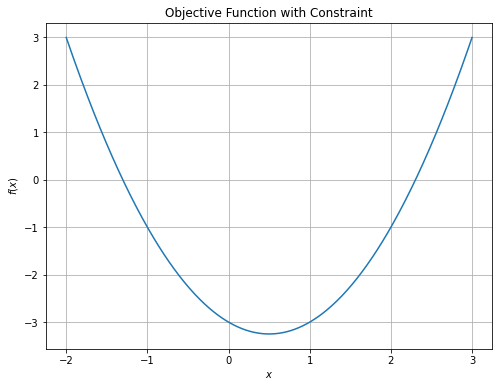

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

def f(x):
    return -x + x**2 - 3

def plot_curve(x, f_x): 
    # Calculate y values
    y = f(x)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(x, y)
    # plt.fill_between(x, y, alpha=0.2, color='blue', where=(-3 <= x) & (x <= 4))  # highlighting the region of interest

    plt.title("Objective Function with Constraint")
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.grid()
    plt.show()    

# Generating x values considering the constraint
x = np.linspace(-2, 3, 400)
plot_curve(x, f)

In [6]:
# We have to specify a starting point for our solver, called x0. 
# In this case, this value will dictate what the solution will be, as there are several in this example. 

sol1 = root(f, x0=np.array([0.0]), args=())
print(sol1)
print("---")
sol2 = root(f, x0=np.array([2.0]), args=())
print(sol2)


    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([3.06892289e-11])
       r: array([3.60555103])
  status: 1
 success: True
       x: array([-1.30277564])
---
    fjac: array([[-1.]])
     fun: array([8.8817842e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([4.19220214e-13])
       r: array([-3.60555126])
  status: 1
 success: True
       x: array([2.30277564])


### Takeaways from Example 1 
In a majority of cases there will be several possible solutions to a system of non-linear equations. However, in the case of calculating power flow this is normally not a problem. This is because we usually initialize x0 reasonably close to the actual solution, and therefore the solver will converge in the correct direction.  

### Example 2 

$$ f(x, \Theta) = \sum_{i=0}^{N_{\theta}} x + \Theta[i](-1)^i $$


In [21]:
np.random.seed(1)

def f(X, Theta): 
    res = 0
    for i in range(0, len(Theta)): 
        res += X[0] + Theta[i]*(-1)**i 
    return res 

x0 = np.array([0.0])
Theta = np.random.uniform(size=10)
sol = root(f, x0, args=(Theta))
sol


    fjac: array([[-1.]])
     fun: 1.1102230246251565e-16
 message: 'The solution converged.'
    nfev: 4
     qtf: array([-1.8592905e-12])
       r: array([-10.])
  status: 1
 success: True
       x: array([0.08524532])

### Example 3
So far we have covered one function with one input. Using root requires the returning variable to be of same size (dimension) as the desicion variable. 

$$ f_1(X, \Theta) = \theta_1 x_1 + 3 $$

$$ f_2(X, \Theta) = \theta_2 x_2^2 - x_1 $$


In [24]:
def func(X, Theta): 
    f1 = Theta[0]*X[0] + 3 
    f2 = Theta[1]*X[1]*X[1] - X[0] 
    return np.array([f1, f2]) 

x0 = np.ones(2)
theta = np.array([-1, 1])

sol = root(func, x0=x0, args=(theta))
print(sol)

    fjac: array([[-0.83205029, -0.5547002 ],
       [ 0.5547002 , -0.83205029]])
     fun: array([0.00000000e+00, 1.33226763e-15])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([6.69459743e-10, 1.00418960e-09])
       r: array([ 1.20185043, -1.92153673, -2.88230505])
  status: 1
 success: True
       x: array([3.        , 1.73205081])


# [Using Scipy for Optimization](#Optimization)
Optimization is different from root finding in three major ways: 
1. The objective function always return only a one-dimentional number
2. A minimum (or maximum) of the objective is found, which might be greater or less than zero. 
3. The algorithm in most cases needs to handle constraints. 

The following examples will be general, and we will use the learned techniques later in the course for power system relevant optimization problems. 

### Example 1

$$ \min J(x) = 2x^2 - 3x + 4 $$

s.t.

No constraints

In [8]:
from scipy.optimize import minimize 

def J(x): 
    return 2*x**2 - 3*x + 4 

sol = minimize(J, x0=np.array([0.0]), args=())
sol

      fun: 2.875
 hess_inv: array([[0.25]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([0.74999999])

### Example 2 - Maximizing and adding constraints

$$ x^* = \arg\max_x J(x) = \sqrt{4-x} +\ln{(x)} $$

s.t.

$$
\begin{align*}
x \in [0, 4]
\end{align*}
$$

We define the $x \in [0, 4]$ as a bound, and scipy has its own argument for that. 

In [27]:
import numpy as np 
from scipy.optimize import minimize

def J(x): # Because scipy only has the minimize function, we return the negative objective function to maximize J 
    return -1.0*(np.sqrt(4-x) + np.log(x))

sol = minimize(J, x0=np.array([1.0]), bounds=[(0, 4)])
print(f"The maximum withing the bounds is J(x)={-sol.fun} at x={sol.x}")
sol

The maximum withing the bounds is J(x)=[2.14115051] at x=[2.47213425]


      fun: array([-2.14115051])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.88498134e-07])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([2.47213425])

### Example 3 - Adding equality and inequality constraints

$$ x^* = \arg\min_x J(X) = X[0] + (X[1]+3)^2 $$

s.t.

$$
\begin{align*}
X[0]^2 + X[1]^2 = 9 \\
X[1] \ge -2 
\end{align*}
$$

TIP: For additional help, consult the [Scipy documentation for minimize.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)

In [10]:
# As stated in the scipy documentation, we define the constraints in a list of dictionaries
# Note that all constraints has to be defined as either "ineq" or "eq", and that the inequality functions has 
# the following form: g(x) <= 0

def J(X): 
    return X[0] + (X[1] + 3)**2

cons = ({'type': 'eq', 'fun': lambda X: X[0]**2 + X[1]**2 - 9}, 
        {'type': 'ineq', 'fun': lambda X: X[1] + 2 })

sol = minimize(J, x0=np.array([-3.0, 3.0]), constraints=cons)
sol

     fun: -1.4425389708909517
     jac: array([1.        , 1.27661653])
 message: 'Optimization terminated successfully'
    nfev: 26
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([-1.8499764 , -2.36169175])

#### End of Notebook
---